In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
BA_US_knn_text = pd.read_csv('knnData/BA_US_knn_text.csv')
BA_US_knn_text.head(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating,text,avg,user_state,beer_state
0,Kupfer Kolsch,289320.0,Copper State Brewing Company,49595.0,Kölsch,4.4,n2185.211743,2.5,4.00,4.0,3.75,3.75,3.76,NaN,3.76,North Carolina,Wisconsin
1,Northwestern Alt,289321.0,Copper State Brewing Company,49595.0,Altbier,4.6,n2185.211743,3.0,3.75,4.0,3.50,3.50,3.58,NaN,3.58,North Carolina,Wisconsin


In [3]:
df_reduced = BA_US_knn_text[['style', 'appearance', 'aroma', 'palate',
                             'taste', 'overall', 'avg', 'user_state']]
df_reduced.head(2)

,style,appearance,aroma,palate,taste,overall,avg,user_state
0,Kölsch,2.5,4.00,4.0,3.75,3.75,3.76,North Carolina
1,Altbier,3.0,3.75,4.0,3.50,3.50,3.58,North Carolina


In [4]:
states = df_reduced['user_state'].unique().tolist()
states.sort()
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [5]:
#states = ['Hawaii', 'Ontario']

In [6]:
styles = df_reduced['style'].unique().tolist()
styles.sort()
styles   #103 styles

['Altbier',
 'American Adjunct Lager',
 'American Amber / Red Ale',
 'American Amber / Red Lager',
 'American Barleywine',
 'American Black Ale',
 'American Blonde Ale',
 'American Brown Ale',
 'American Dark Wheat Ale',
 'American Double / Imperial IPA',
 'American Double / Imperial Pilsner',
 'American Double / Imperial Stout',
 'American IPA',
 'American Malt Liquor',
 'American Pale Ale (APA)',
 'American Pale Lager',
 'American Pale Wheat Ale',
 'American Porter',
 'American Stout',
 'American Strong Ale',
 'American Wild Ale',
 'Baltic Porter',
 'Belgian Dark Ale',
 'Belgian IPA',
 'Belgian Pale Ale',
 'Belgian Strong Dark Ale',
 'Belgian Strong Pale Ale',
 'Berliner Weissbier',
 'Bière de Champagne / Bière Brut',
 'Bière de Garde',
 'Black & Tan',
 'Bock',
 'Braggot',
 'California Common / Steam Beer',
 'Chile Beer',
 'Cream Ale',
 'Czech Pilsener',
 'Doppelbock',
 'Dortmunder / Export Lager',
 'Dubbel',
 'Dunkelweizen',
 'Eisbock',
 'English Barleywine',
 'English Bitter',
 'En

In [26]:

# Data for states and populations
state_population_data = {
    "State": [
        "California", "Texas", "Florida", "New York", "Pennsylvania", "Illinois", "Ohio", "Georgia", 
        "North Carolina", "Michigan", "New Jersey", "Virginia", "Washington", "Arizona", "Tennessee", 
        "Massachusetts", "Indiana", "Missouri", "Maryland", "Wisconsin", "Colorado", "Minnesota", 
        "South Carolina", "Alabama", "Louisiana", "Kentucky", "Oregon", "Oklahoma", "Connecticut", 
        "Utah", "Iowa", "Nevada", "Arkansas", "Kansas", "Mississippi", "New Mexico", "Nebraska", "Idaho", 
        "West Virginia", "Hawaii", "New Hampshire", "Maine", "Montana", "Rhode Island", "Delaware", 
        "South Dakota", "North Dakota", "Alaska", "Vermont", "Wyoming"
    ],
    "Population": [
        38965193, 30503301, 22610726, 19571216, 12961683, 12549689, 11785935, 11029227, 10835491, 
        10037261, 9290841, 8715698, 7812880, 7431344, 7126489, 7001399, 6862199, 6196156, 6180253, 
        5910955, 5877610, 5737915, 5373555, 5108468, 4573749, 4526154, 4233358, 4053824, 3617176, 
        3417734, 3207004, 3194176, 3067732, 2940546, 2939690, 2114371, 1978379, 1964726, 1770071, 
        1435138, 1402054, 1395722, 1132812, 1095962, 1031890, 919318, 783926, 733406, 647464, 584057
    ]
}

state_population_df = pd.DataFrame(state_population_data)

state_population_df.head(3)


,State,Population
0,California,38965193
1,Texas,30503301
2,Florida,22610726


In [32]:
def calc_features(style, df, state_population):
    
    avg_appearance = df['appearance'].mean()
    avg_aroma = df['aroma'].mean()
    avg_palate = df['palate'].mean()
    avg_taste = df['taste'].mean()
    avg_overall = df['overall'].mean()
    avg_rating = df['avg'].mean()
    std_rating = df['avg'].std()
    review_count = df.shape[0]  #is itright to add this one?? also feels like we're grouping by size of state...
    normalized_review_count = review_count / state_population
    
    
    df = pd.DataFrame(columns=['avg_appearance', 'avg_aroma', 'avg_palate', 
                                        'avg_taste', 'avg_overall','avg_rating_per_style',
                                        'std_per_style', 'normalised_revcount'])
    
    df.loc[0] = [avg_appearance,avg_aroma,avg_palate,avg_taste,
                 avg_overall,avg_rating,std_rating,normalized_review_count]
    
    df = df.rename(columns=lambda col: style+'_'+col)
    
    return df
    

In [33]:
df_total_clustering = pd.DataFrame()

for state in states:
    df_state = df_reduced[df_reduced['user_state'] == state]
    
    df_clustering = pd.DataFrame(columns=['user_state'])
    df_clustering.loc[0, 'user_state'] = state
    
    # Add the population for the current state
    state_population = state_population_df[state_population_df['State'] == state]['Population'].values[0]

    for style in styles:
        df_style = df_state[df_state['style'] == style]
        
        # Pass state_population to calc_features to get normalized reviews per state
        df_features = calc_features(style, df_style, state_population)
        
        df_clustering = pd.concat([df_clustering, df_features], axis=1)
    
    df_total_clustering = pd.concat([df_total_clustering, df_clustering], ignore_index=True)

In [36]:
df_total_clustering.head(3)

,user_state,Altbier_avg_appearance,Altbier_avg_aroma,Altbier_avg_palate,Altbier_avg_taste,Altbier_avg_overall,Altbier_avg_rating_per_style,Altbier_std_per_style,Altbier_normalised_revcount,American Adjunct Lager_avg_appearance,...,Winter Warmer_std_per_style,Winter Warmer_normalised_revcount,Witbier_avg_appearance,Witbier_avg_aroma,Witbier_avg_palate,Witbier_avg_taste,Witbier_avg_overall,Witbier_avg_rating_per_style,Witbier_std_per_style,Witbier_normalised_revcount
0,Alabama,3.911765,3.727941,3.750000,3.867647,3.889706,3.662556,0.234964,0.000018,2.795000,...,0.237897,0.000045,3.644426,3.601351,3.529561,3.531250,3.605574,3.558156,0.303586,0.000131
1,Alaska,3.768750,3.537500,3.618750,3.625000,3.712500,3.672676,0.178445,0.000097,2.938406,...,0.227813,0.000158,3.810748,3.721963,3.738318,3.778037,3.824766,3.671274,0.269055,0.000214
2,Arizona,3.667431,3.490826,3.552752,3.614679,3.621560,3.668010,0.218246,0.000026,3.024648,...,0.230187,0.000071,3.612069,3.605172,3.587356,3.589655,3.609770,3.578366,0.334341,0.000110


In [ ]:
#Figuring out how many columns have missing values
#We're going to remove these columns
nan_percentage = df_total_clustering.isna().mean() * 100
nan_percentage_with_values = nan_percentage[nan_percentage > 0]
# Get the unique NaN percentage values
unique_nan_percentages = nan_percentage_with_values.unique()
print(unique_nan_percentages)


[14.  4.  2. 10. 12. 40. 36. 50. 80. 74. 90.  8. 34. 46. 38. 22.  6.]


In [37]:
columns_df = pd.DataFrame(df_total_clustering.columns, columns=["Column Names"])
columns_df.head(17)

,Column Names
0,user_state
1,Altbier_avg_appearance
2,Altbier_avg_aroma
3,Altbier_avg_palate
4,Altbier_avg_taste
5,Altbier_avg_overall
6,Altbier_avg_rating_per_style
7,Altbier_std_per_style
8,Altbier_normalised_revcount
9,American Adjunct Lager_avg_appearance


Time for feature selection + K means clustering

In [73]:
#remove all columns with empty values (no reviews for beer styles in at least one state)
df_cleaned = df_total_clustering.dropna(axis=1)

# Print the shape of the cleaned DataFrame
print(f"Shape of the DataFrame after removing columns with NaNs: {df_cleaned.shape}")


Shape of the DataFrame after removing columns with NaNs: (50, 698)


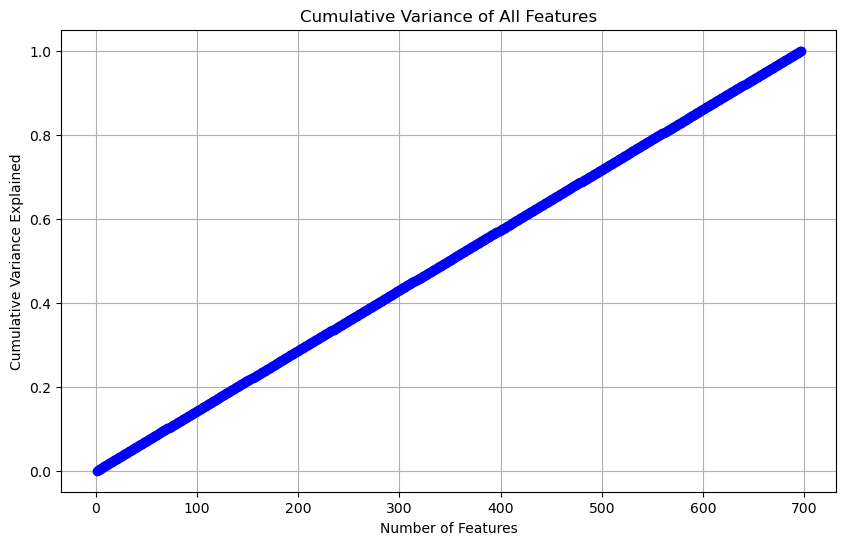

In [74]:
# Remove 'user_state' from the dataframe
user_state = df_cleaned['user_state']

df_numeric = df_cleaned.drop(columns=['user_state'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
feature_variance = np.var(df_scaled, axis=0)

#Calculate cumulative variance
cumulative_variance = np.cumsum(feature_variance) / np.sum(feature_variance)  # Normalize by total variance

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance of All Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


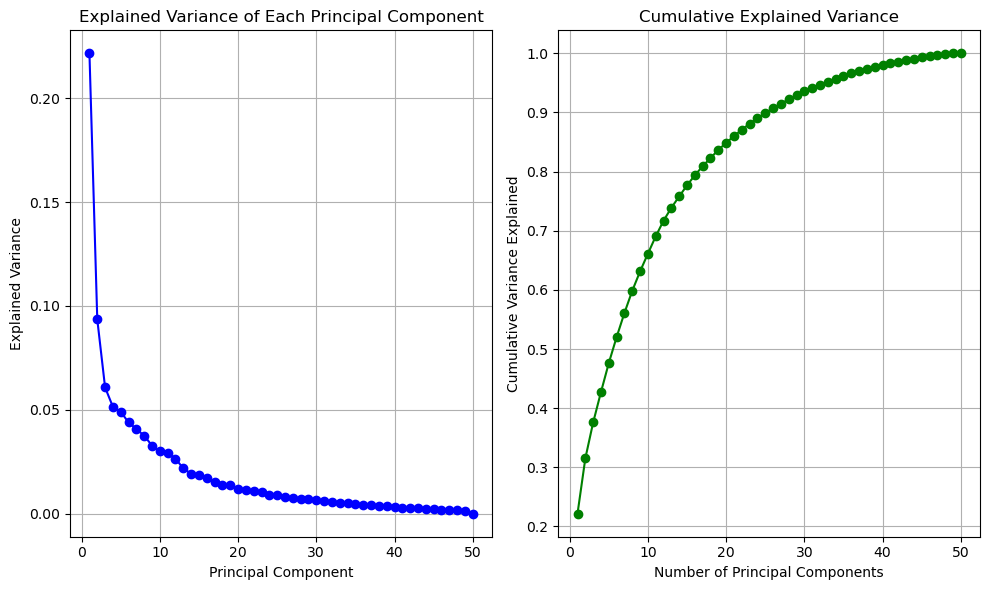

In [75]:

pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance of Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)

plt.tight_layout()
plt.show()


In [78]:
#90% variance explained
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.9) + 1

# Step 4: Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Step 5: Perform K-Means clustering using the reduced dataset (first n_components)
kmeans = KMeans(n_clusters=6, random_state=42)  # Change n_clusters as needed
df_pca_clusters = kmeans.fit_predict(df_pca)

# Optionally, add the clusters back to the DataFrame
#df_numeric['cluster'] = df_pca_clusters



c:\Users\iaran\miniconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


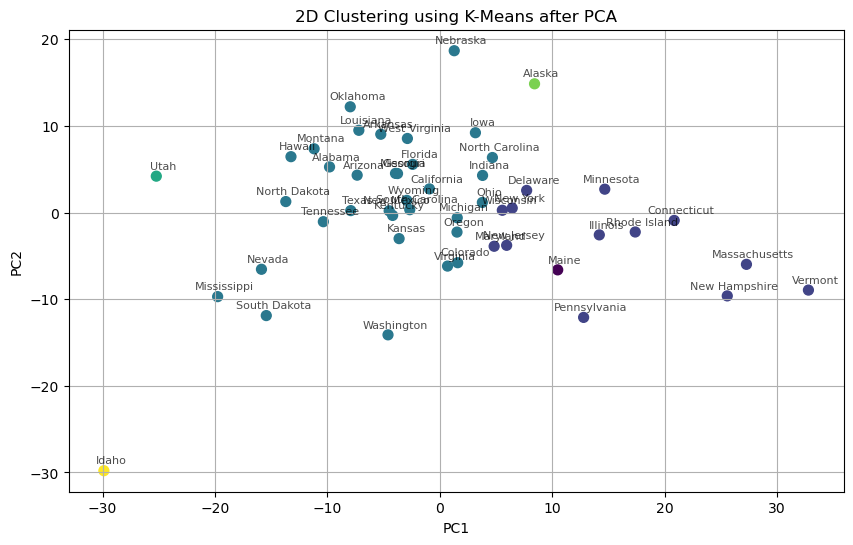

In [79]:

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_pca_clusters, cmap='viridis', s=50)

for i, state in enumerate(states):
    plt.annotate(state, (df_pca[i, 0], df_pca[i, 1]), 
                 textcoords="offset points", 
                 xytext=(5, 5),
                 ha='center', fontsize=8, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Clustering using K-Means after PCA')

plt.grid(True)
plt.show()